# Manhattan Distance d 

Manhattan distance from (a, b) to (x, y) is defined as 
$$ d := |x-a| + |y-b|$$

Let's fill the region $ A=\{(x,y): d= |x-a| + |y-b| \geq 2\}$ in Black

# simplest case a=b=0
* region A is symmetric w.r.t. x=a and y=b
* region $A_0:=\{(x,y): |x|+|y|\geq 2\}$ has the same shape as A

So Let's consider $A_0$ in the first quadrant

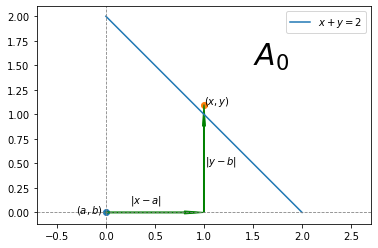

In [1]:
import numpy as np
import matplotlib.pyplot as plt

a, b = 0, 0
sample_x, sample_y = 1, 1.1
eps = 2
x = np.linspace(0, 2, 100) 
y = -x + eps 

fig, ax = plt.subplots()
ax.plot(x, y, label='$ x + y = 2 $')
ax.scatter(a, b)
ax.scatter(sample_x, sample_y)
arrow1 = plt.Arrow(0,0, 1, 0, width=0.05, color='green') # |x-a|
arrow2 = plt.Arrow(1, 0, 0, 1.1, width=0.05, color='green') # |y-b|
ax.add_patch(arrow1)
ax.add_patch(arrow2)
ax.axis('equal')

# Add texts
ax.text(-0.3, 0, '$(a,b)$', fontsize=10) 
ax.text(sample_x, sample_y, '$(x,y)$', fontsize=10) 
ax.text(1.5, 1.5, '$A_0$', fontsize=30) 
ax.text(0.25, 0.1, '$|x-a|$', fontsize=10) 
ax.text(1.01, 0.5, '$|y-b|$', fontsize=10) 

# Add horizontal and vertical axes
ax.axhline(0, color='gray', linestyle='--', linewidth=0.8)  # Horizontal axis
ax.axvline(0, color='gray', linestyle='--', linewidth=0.8)  # Vertical axis

ax.legend()
plt.show()

# Consider the general case

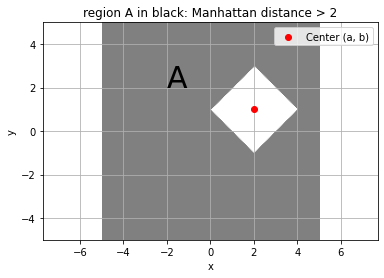

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def manhattan_distance(x, y, a, b):
    return abs(x - a) + abs(y - b)

def is_in_region(x, y, a, b):
    return manhattan_distance(x, y, a, b) > 2

# Define the range of x and y coordinates for plotting
k=5
x = np.linspace(-k, k, 200)
y = np.linspace(-k, k, 200)

# Create a grid of (x, y) coordinates
X, Y = np.meshgrid(x, y)

# Define the coordinates (a, b) for the Manhattan distance center
a, b = 2, 1

# Calculate whether each point in the grid is inside the region C
region = np.vectorize(lambda x, y: is_in_region(x, y, a, b))(X, Y)

# Create a figure and axes object
fig, ax = plt.subplots()

# Fill the region where the Manhattan distance is greater than 2 in black
ax.imshow(~region, extent=(-k, k, -k, k), origin='lower', cmap='gray', alpha=0.5)

# Plot the center point
ax.scatter(a, b, color='red', label='Center (a, b)', zorder=5)

# Add Text
ax.text(-2, 2, 'A', fontsize=30) 

# Set axis labels and grid
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid(True)
ax.axis('equal')

# Set the title
ax.set_title('region A in black: Manhattan distance > 2')

# Show the plot
plt.legend()
plt.show()


# Note:
With grayscale color map,  
True value will be displayed as white, and False value will be displayed as black.

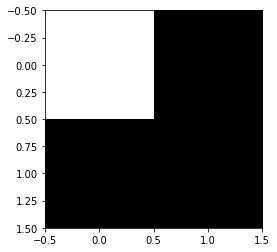

In [3]:
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(np.array([[True, False],[False, False]]), cmap='gray')

# Plot the Manhattan distances in color

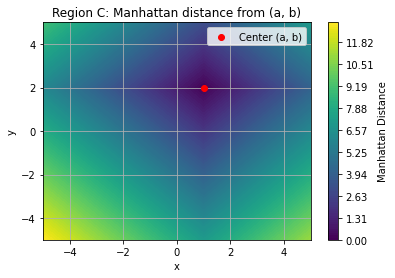

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def manhattan_distance(x, y, a, b):
    return abs(x - a) + abs(y - b)

def is_in_region(x, y, a, b):
    return manhattan_distance(x, y, a, b)

# Define the range of x and y coordinates for plotting
x = np.linspace(-5, 5, 200)
y = np.linspace(-5, 5, 200)

# Create a grid of (x, y) coordinates
X, Y = np.meshgrid(x, y)

# Define the coordinates (a, b) for the Manhattan distance center
a, b = 1, 2

# Calculate the Manhattan distances for each point in the grid
distances = is_in_region(X, Y, a, b)

# Create a figure and axes object
fig, ax = plt.subplots()

# Plot the distances as the filled contour
contour = ax.contourf(X, Y, distances, levels=np.linspace(0, np.max(distances), 100), cmap='viridis')
cbar = fig.colorbar(contour, ax=ax, label='Manhattan Distance')

# Plot the center point
ax.scatter(a, b, color='red', label='Center (a, b)', zorder=5)

# Set axis labels and grid
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid(True)

# Set the title
ax.set_title('Region C: Manhattan distance from (a, b)')

# Show the plot
plt.legend()
plt.show()
